In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../1_dock')
sys.path.append('../../ifp')
sys.path.append('../../mcss')
sys.path.append('../../3_analyze')
from shared_paths import shared_paths
from containers import Protein
%matplotlib inline

assert shared_paths['docking'] == 'glide12'

In [2]:
datasets = [d for d in sorted(os.listdir(shared_paths['data']))
            if d[0] != '.' and d[-3:] != 'old']

In [3]:
data = {}
for i, d in enumerate(datasets):
    print(i, d)
    protein = Protein(d)
    lm = protein.lm

    ligands = lm.docked(lm.pdb)[:20]
    protein.load_docking(ligands, False, False, False)
    lm.mcss.load_mcss()
    for ligand in ligands:
        crystal_lig = "{}_lig".format(lm.st)
        if ligand == crystal_lig:
            size = 'CRSYTAL'
        else:
            size = lm.mcss.get_mcss_size(ligand, crystal_lig)
        rmsds = [pose.rmsd for pose in protein.docking[lm.st].ligands[ligand].poses]
        if d not in data: data[d] = {}
        data[d][ligand] = (size, rmsds)

(0, '5HT2B')
(1, 'A2AR')
(2, 'AR')
(3, 'B1AR')
(4, 'B2AR')
(5, 'BRAF')
(6, 'CDK2')
(7, 'CHK1')
(8, 'DTRANSP')
(9, 'ERA')
(10, 'GCR')
(11, 'GLUT1')
(12, 'JAK2')
(13, 'M3')
(14, 'MEK1')
(15, 'MGLUR5')
(16, 'MR')
(17, 'O60885')
(18, 'P00489')
(19, 'P00734')
(20, 'P00742')
(21, 'P00749')
(22, 'P00760')
(23, 'P03951')
(24, 'P07900')
(25, 'P18031')
(26, 'P24941')
(27, 'P56817')
(28, 'PLK1')
(29, 'Q16539')
(30, 'Q9Y233')
(31, 'SIGMA1')
(32, 'SMO')
(33, 'STRANSP')
(34, 'TRPV1')
(35, 'VITD')


In [4]:
print len(data)
print sum([len(v) for k, v in data.items()])
print
for count, key in sorted([(len(v), k) for k, v in data.items()]):
    print '{}\t{}'.format(key, count)

36
513

5HT2B	2
M3	2
SIGMA1	2
TRPV1	2
GLUT1	3
MGLUR5	5
STRANSP	5
SMO	7
B2AR	8
DTRANSP	9
AR	11
B1AR	12
PLK1	12
MR	13
P24941	13
P03951	14
O60885	17
A2AR	18
GCR	18
BRAF	20
CDK2	20
CHK1	20
ERA	20
JAK2	20
MEK1	20
P00489	20
P00734	20
P00742	20
P00749	20
P00760	20
P07900	20
P18031	20
P56817	20
Q16539	20
Q9Y233	20
VITD	20


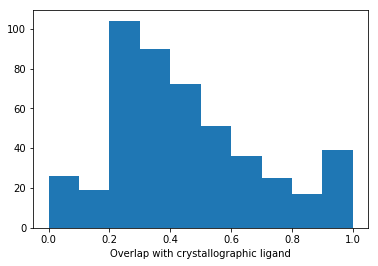

In [5]:
plt.hist([size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
          if size != 'CRSYTAL'])
plt.xlabel('Overlap with crystallographic ligand')
plt.show()

In [6]:
def plot(correct, total, crystal_correct, crystal_total, l1, l2, title):
    a = plt.hist([correct, total], label = [l1, l2], bins = 5)
    plt.xlabel('Overlap with crystallographic ligand')
    plt.legend()
    plt.show()

    correct, total = a[0]
    x = list((a[1][:-1] + a[1][1:]) / 2.0)

    plt.bar(x + [1.1], list(np.array(correct) / np.array(total))+[crystal_correct/ float(crystal_total)],  width = 0.1)
    plt.xlim(0, 1.2)
    plt.ylim(0, 1)
    plt.xticks([0, .2, .4, .6, .8, 1.0, 1.1], [0, .2, .4, .6, .8, 1.0, 'C'])
    plt.title(title)
    plt.xlabel('Overlap with crystallographic ligand')
    plt.show()

# Fraction top pose correct

0.438413361169


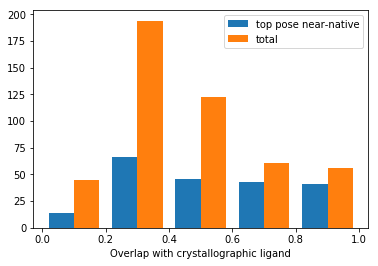

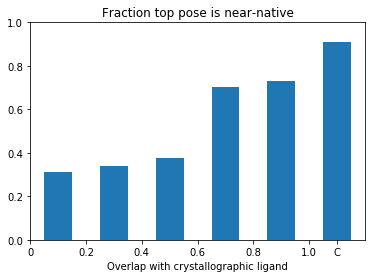

In [13]:
correct   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
             if rmsds[0] <= 2.0 and size != 'CRSYTAL']
total = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
         if size != 'CRSYTAL']
             
crystal_correct = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if rmsds[0] <= 2.0 and size == 'CRSYTAL'])
crystal_total   = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if size == 'CRSYTAL'])
print len(correct) / float(len(total))

l1, l2, title = 'top pose near-native', 'total', 'Fraction top pose is near-native'
plot(correct, total, crystal_correct, crystal_total, l1, l2, title)

# Correct pose in top 100

0.676409185804


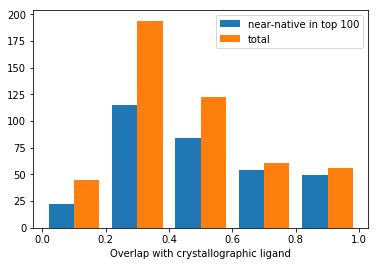

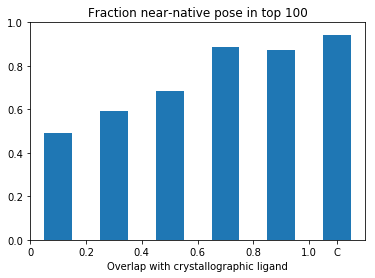

In [14]:
correct   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
             if min(rmsds[:100]) <= 2.0 and size != 'CRSYTAL']
total = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
         if size != 'CRSYTAL']

crystal_correct = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if min(rmsds[:100]) <= 2.0 and size == 'CRSYTAL'])
crystal_total   = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if size == 'CRSYTAL'])
print len(correct) / float(len(total))

l1, l2, title = 'near-native in top 100', 'total', 'Fraction near-native pose in top 100'
plot(correct, total, crystal_correct, crystal_total, l1, l2, title)

# Top pose correct given that one exists in top 100

0.648148148148


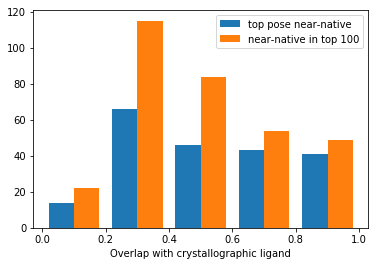

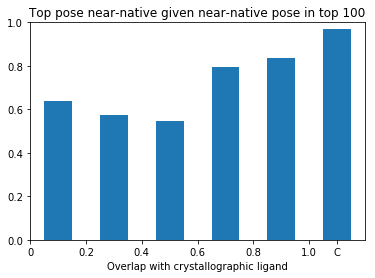

In [12]:
correct = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
           if rmsds[0] <= 2.0 and size != 'CRSYTAL']
total   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
           if min(rmsds[:100]) <= 2.0 and size != 'CRSYTAL']

crystal_correct = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if rmsds[0] <= 2.0 and size == 'CRSYTAL'])
crystal_total   = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if min(rmsds[:100]) <= 2.0 and size == 'CRSYTAL'])

print len(correct) / float(len(total))

l1, l2, title = 'top pose near-native', 'near-native in top 100', 'Top pose near-native given near-native pose in top 100'
plot(correct, total, crystal_correct, crystal_total, l1, l2, title)

# What does MCSS size zero look like? 

In [10]:
c = 0
for protein, ligands in data.items():
    for ligand, (size, rmsds) in ligands.items():
        if size < .2:
            print protein, ligand, size
c

O60885 4OGJ_lig 0.1875
P07900 2QFO_lig 0.0
P07900 2XDK_lig 0.0
P07900 3B24_lig 0.0
P07900 1YET_lig 0.0
P18031 1NWL_lig 0.0
MEK1 3ZLS_lig 0.0
JAK2 3IO7_lig 0.173913043478
JAK2 2XA4_lig 0.173913043478
JAK2 3FUP_lig 0.173913043478
JAK2 3ZMM_lig 0.173913043478
P00742 1NFW_lig 0.0
P00742 1F0S_lig 0.0
P00742 1NFX_lig 0.181818181818
P00742 1Z6E_lig 0.176470588235
P00742 2BOH_lig 0.181818181818
P00734 1D3P_lig 0.153846153846
P00734 1BHX_lig 0.193548387097
P00734 1D3D_lig 0.157894736842
AR 2HVC_lig 0.190476190476
AR 2AX9_lig 0.0
VITD 3AZ1_lig 0.0
A2AR 5OLO_lig 0.157894736842
SMO 4O9R_lig 0.0
CHK1 2CGX_lig 0.0
CHK1 1ZYS_lig 0.193548387097
CHK1 2CGW_lig 0.0
CHK1 1ZLT_lig 0.0
CHK1 2C3J_lig 0.0
CDK2 1DM2_lig 0.0
CDK2 1H0V_lig 0.0
CDK2 1GZ8_lig 0.0
CDK2 1FIN_lig 0.0
GCR 3E7C_lig 0.1875
GCR 5G5W_lig 0.1875
GCR 5NFT_lig 0.1875
GCR 6EL6_lig 0.1875
BRAF 3PPJ_lig 0.0
MR 5L7G_lig 0.0
MR 3VHV_lig 0.0
MR 3WFG_lig 0.0
MR 5HCV_lig 0.0
MR 5MWP_lig 0.0
MR 5L7E_lig 0.166666666667
MR 3WFF_lig 0.0


0